由于鸢尾花数据集每个数据含有4个属性，最终要依据四个属性将花分类为3种，因此该问题属于多分类问题，考虑使用softmax回归

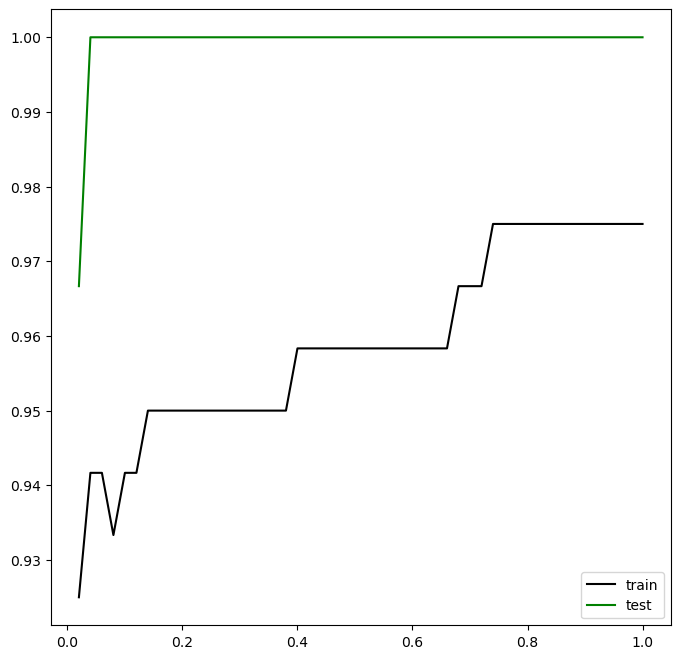

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#split train data and test data
iris=load_iris()
data=iris.data
target=iris.target
data_train, data_test, target_train, target_test=train_test_split(data, target, test_size=0.2, random_state=224)
train_result=[]
test_result=[]

for i in np.linspace(0.02, 1, 50):
  #train model
  softmax=LogisticRegression(penalty='l2', multi_class='multinomial', solver='lbfgs', C=i, max_iter=1000)
  softmax=softmax.fit(data_train, target_train)

  #test model
  #print(i)
  train_result.append(accuracy_score(softmax.predict(data_train), target_train))
  test_result.append(accuracy_score(softmax.predict(data_test), target_test))

graph=[train_result, test_result]
color=['black', 'green']
label=['train', 'test']
plt.figure(figsize=(8,8))
for i in range(len(graph)):
  plt.plot(np.linspace(0.02, 1, 50), graph[i], color[i], label= label[i])
plt.legend(loc=4)
plt.show()